In [1]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 5.6 MB/s eta 0:00:0000:0100:01


In [ ]:
#
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [2]:

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
 #plot bert architecture


# DF diagnosis

In [4]:
#import the raw data
df_diagnosis = pd.read_csv('data/raw/nlp/mimic/ADMISSIONS.csv')
df_diagnosis.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [5]:
#get the number of unique patients
df_diagnosis['SUBJECT_ID'].nunique()


46520

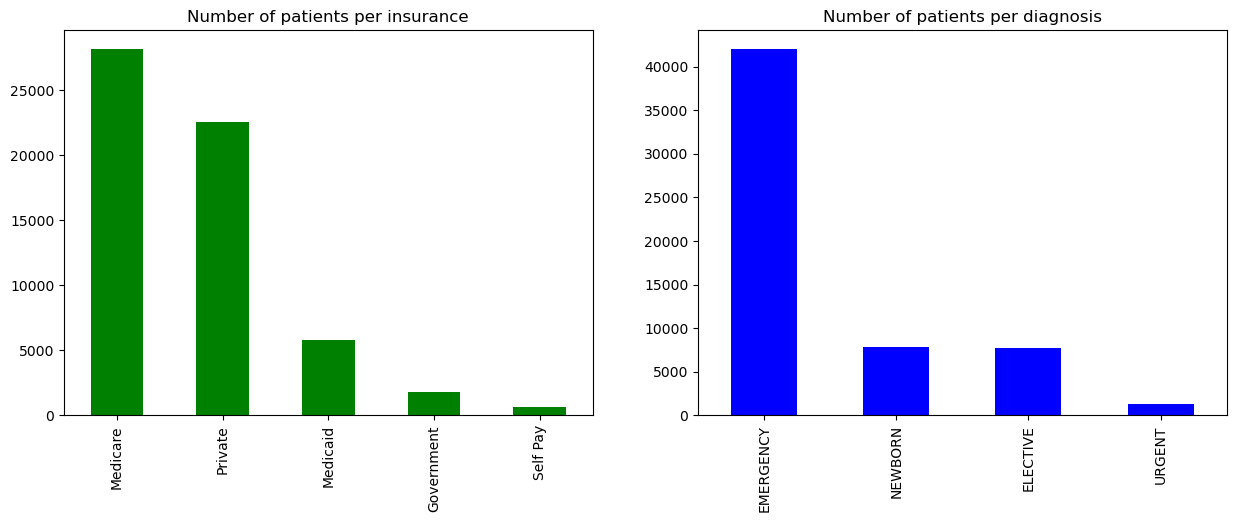

In [16]:
#plot the number of patients per diagnosis and insurance
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_diagnosis['INSURANCE'].value_counts().plot(kind='bar', ax=ax[0], title='Number of patients per insurance', color='green')
df_diagnosis['ADMISSION_TYPE'].value_counts().plot(kind='bar', ax=ax[1], title='Number of patients per diagnosis', color='blue')

plt.show()



In [19]:
#total number of ethnicity
df_diagnosis['ETHNICITY'].nunique() # 41
df_diagnosis['ETHNICITY'].value_counts().head(10)


WHITE                             40996
BLACK/AFRICAN AMERICAN             5440
UNKNOWN/NOT SPECIFIED              4523
HISPANIC OR LATINO                 1696
OTHER                              1512
ASIAN                              1509
UNABLE TO OBTAIN                    814
PATIENT DECLINED TO ANSWER          559
ASIAN - CHINESE                     277
HISPANIC/LATINO - PUERTO RICAN      232
Name: ETHNICITY, dtype: int64

<AxesSubplot:title={'center':'Number of patients per marital status'}, ylabel='MARITAL_STATUS'>

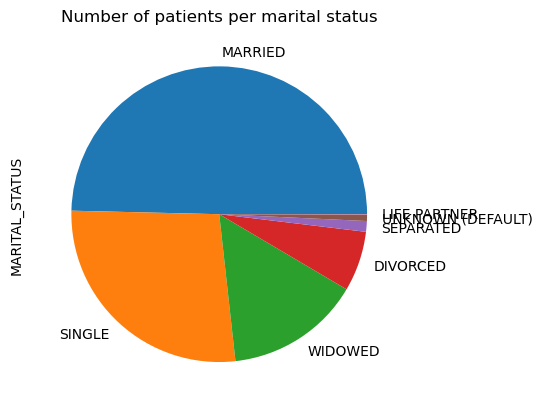

In [27]:
#plot marutal status pretty small
    
# how many ethnicities make up 90% of the data
test = df_diagnosis.groupby('ETHNICITY').count().sort_values(by='SUBJECT_ID', ascending=False).cumsum().head(10) 
test

df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='pie', title='Number of patients per marital status')

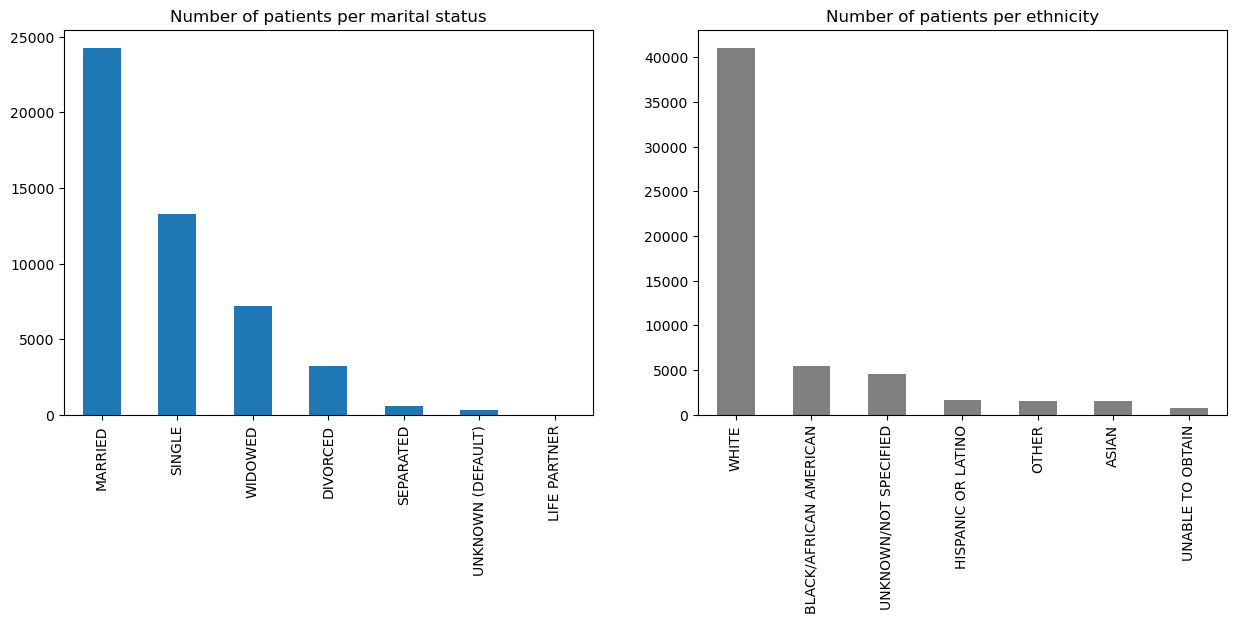

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='bar', ax=ax[0], title='Number of patients per marital status')
#df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='pie', ax=ax[0], title='Number of patients per marital status')
df_diagnosis['ETHNICITY'].value_counts().head(7).plot(kind='bar', ax=ax[1], title='Number of patients per ethnicity', color='grey')
plt.show()

In [ ]:
#marital status and ethnicity
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='bar', ax=ax[0], title='Number of patients per marital status', color='green')
df_diagnosis    

In [23]:
# show average stay per diagnosis
#fist calculate the stay
#first convert to datetime
df_diagnosis['ADMITTIME'] = pd.to_datetime(df_diagnosis['ADMITTIME'])
df_diagnosis['DISCHTIME'] = pd.to_datetime(df_diagnosis['DISCHTIME'])
df_diagnosis['stay'] = df_diagnosis['DISCHTIME'] - df_diagnosis['ADMITTIME']
df_diagnosis.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,stay
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1 days 03:28:00
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5 days 11:55:00
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,6 days 18:26:00


In [25]:
#convert stay to days
df_diagnosis['stay'] = df_diagnosis['stay'].dt.days


In [26]:
#show the average, variance stay per diagnosis
df_stay =df_diagnosis.groupby('ADMISSION_TYPE')['stay'].agg(['mean', 'var', 'std'])
df_stay 


,mean,var,std
ADMISSION_TYPE,,,
ELECTIVE,8.563717,103.990294,10.197563
EMERGENCY,9.469397,118.663284,10.893268
NEWBORN,11.030777,392.800630,19.819199
URGENT,11.740269,173.933239,13.188375


9.610672137818774
6.0
0    4
Name: stay, dtype: int64


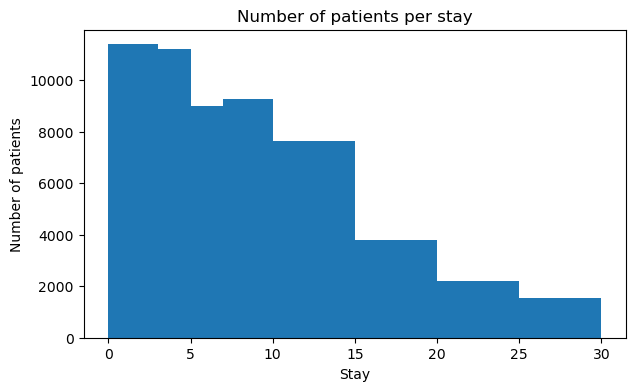

In [33]:
#overall average of stay
print(df_diagnosis['stay'].mean()) # 4.5 days
print(df_diagnosis['stay'].median())      
print(df_diagnosis['stay'].mode()) # 3 days
# plot the number of different stays in bins x between 0 and 30
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 4))
bins = [0, 3, 5, 7, 10, 15, 20, 25, 30]
ax.hist(df_diagnosis['stay'], bins = bins)
# add title and axis names
plt.title('Number of patients per stay')
plt.xlabel('Stay')
plt.ylabel('Number of patients')
# show plot
 
# Show plot
plt.show()


# Noteevents table

In [38]:
#mimic processed
df_diagnoes_processed = pd.read_csv('data/processed/mimic_iii/diagnoses_noteevents_cleaned.csv')
df_diagnoes_processed.head()

,TEXT,specialty,TEXT_final,TEXT_final_cleaned
0,Admission Date: [**2141-9-18**] ...,Cardiothoracic & Vascular,":\nhip pain\n\n:\n24yo woman with hx SLE, CKD(...",hip pain woman hx SLE CKD currently HD PD labi...
1,Admission Date: [**2187-9-19**] ...,Emergency Department,:\ns/p Motor cycle crash; left sided rib pain\...,Motor cycle crash left sided rib pain driver h...
2,Admission Date: [**2190-6-5**] Discharg...,Emergency Department,NaN,NaN
3,Admission Date: [**2101-4-30**] ...,Infectious Disease Specialty,:\nOSH transfer for sepsis\n\n:\n75 y/o M with...,sepsis hx type DM ESRD failed renal tx HD mont...
4,Admission Date: [**2146-9-15**] ...,Cardiothoracic & Vascular,":\nChest Pain, Abdominal Pain, Nausea/Vomiting...",Chest Pain Abdominal Pain Nausea Vomiting Righ...


<AxesSubplot:title={'center':'Number of patients per specialty'}>

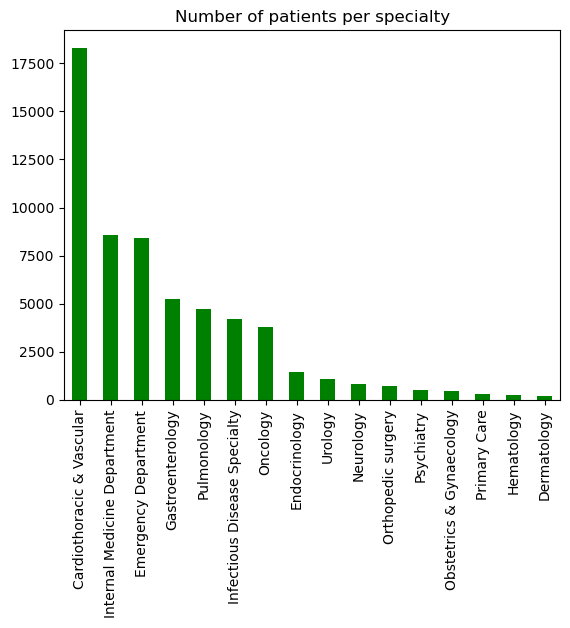

: 

In [39]:
#visualize number of specialties
df_diagnoes_processed['specialty'].value_counts().plot(kind='bar', title='Number of patients per specialty', color='green')
